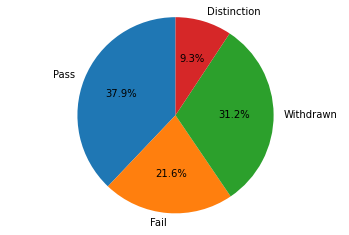

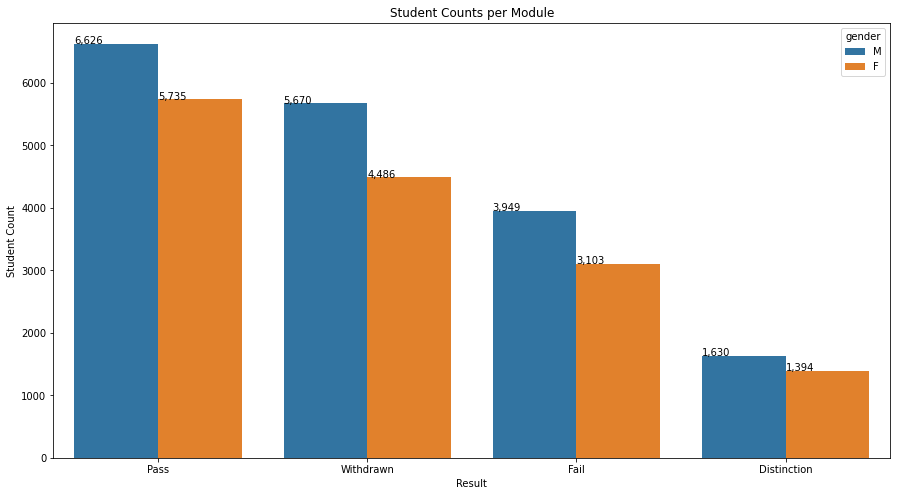

In [3]:

from functions import *
from ipynb.fs.full.Student_Information import stud_info
from ipynb.fs.full.Courses import courses

# Assessments
---

## Assessments
---

The assessments dataframe contains information about the unique assessments in each code module and presentation.

In [4]:
# show assessments dataframe
assessments.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0


**Size**

In [5]:
# function to get a dataframe of rows and columns
get_size(assessments)

,Count
Columns,6
Rows,206


In [6]:
md(f'''
Assessments has {len(assessments.columns)} features describing {len(assessments)} exam records.
''')


Assessments has 6 features describing 206 exam records.


---

### Assessments Contents

* **code_module**: The code module represents the code name of the course the assessment was held for.
* **code_presentation**: The presentation represents the presentation which the test was held for.
* **id_assessment**: The assessment ID is the unique identifier for each assessment.
* **assessment_type**: The assessment type represents the kind of assessment it was.
    - There are three assessment types:
        * TMA: Tutor Marked Assessment
        * CMA: Computer Marked Assessment
        * Exam: The Final Exam
* **date**: The date is how many days from the start of the course the assessment took place
* **weight**: The weight is the weighted value of the assessment. Exams should have a weight of 100 which the rest of the assessments should add to 100 in total.

* column names will be changed to be less verbose
    * code_module to module
    * code_presentation to presentation

In [7]:
# make a dictionary of columns mapping to their new name
assessments_rename = {'code_module':'module', 'code_presentation':'presentation'}
# rename columns in assessments based on dictionary
assessments = assessments.rename(columns=assessments_rename)

## Student Assessment

---

The Student Assessments dataframe contains information about each student and the assessments they took during the module

In [8]:
# show first 5 student_assessment entries
student_assessment.head()

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0


**Size**

In [9]:
# get the size of student_assessment
get_size(student_assessment)

,Count
Columns,5
Rows,173912


In [10]:
# store the size of student_assessment's columns
sa_cols = len(student_assessment.columns)
# store the size of student_assessment's rows
sa_rows = len(student_assessment)
md(f'''
Student Assessment has {sa_cols} columns and {"{:,}".format(sa_rows)} rows, which is how many exams we have data for.
''')


Student Assessment has 5 columns and 173,912 rows, which is how many exams we have data for.


---

### Student Assessment Contents

* **id_assessment**: The assessment ID is the unique identifier for the assessment the student took.
* **id_student**: The student ID is the unique identifier for the student who took the assessment.
* **date_submitted**: The date submitted is the date the student submitted the exam relevant to the start date of the module.
* **is_banked**: Whether the score for the assessment is banked indicates wheter the assessment result was transferred from a previous presentation.
    - is_banked has no relevant information to our analysis and can be removed
* **score**: The score the student received for the assessment. 40 or above is considered a passing score.

* column names will be changed to be less verbose
    * code_module to module
    * code_presentation to presentation

In [12]:
student_assessment = student_assessment.drop(columns='is_banked')

---

### Assessments Information

**Data Types**

In [9]:
# function to get a dataframe of data types
get_dtypes(assessments)

index,Type
module,object
presentation,object
id_assessment,int64
assessment_type,object
date,float64
weight,float64


* `id_assessments` is a categorical value and so should be converted to `string`
* `object` types should be converted to strings
* Both of the `float64` typed variables are whole numbers and should be converted to `int64`

In [10]:
# converting the data types
# id assessment to string
assessments['id_assessment'] = assessments['id_assessment'].astype(str)
# all other data types to those which support pandas <NA>
assessments = assessments.convert_dtypes(convert_integer=False)

**Null Values**

In [11]:
# function to return dataframe of nulls in columns
null_vals(assessments)

index,Null Values
module,0
presentation,0
id_assessment,0
assessment_type,0
date,11
weight,0


In [12]:
md(f'''
* We have {assessments['date'].isnull().sum()} null data points for assessment date. 
* The documentation of this dataset states that if the exam date is missing then it is as the end of the last presentation week. 
* We can find this information in the courses dataframe, and add them in to get rid of the NaNs.
''')


* We have 11 null data points for assessment date. 
* The documentation of this dataset states that if the exam date is missing then it is as the end of the last presentation week. 
* We can find this information in the courses dataframe, and add them in to get rid of the NaNs.


In [1]:
# iterate through assessments entries where date is NA
for index, row in assessments[assessments['date'].isna()].iterrows():
    # change assessments date at current index to the module_presentation_length found in courses by locating the matching module/presentation
    assessments.at[index, 'date'] = courses.loc[(courses['module'] == row['module']) & (courses['presentation'] == row['presentation']), 'module_presentation_length']

# give a dataframe of null values to ensure there are now none
dataframe(assessments.isnull().sum(), columns=['Null Values'])

NameError: name 'assessments' is not defined

**Unique Counts**

In [14]:
# function to get unique value counts
count_unique(assessments)

index,Count
module,7
presentation,4
id_assessment,206
assessment_type,3
date,78
weight,24


In [15]:
md(f'''
There are {assessments['id_assessment'].nunique()} unique assessment ID's
''')


There are 206 unique assessment ID's


**Unique Categorical Values**

In [16]:
# function to get unique categorical values in columns
unique_vals(assessments)

index,Values
module,"['AAA', 'BBB', 'CCC', 'DDD', 'EEE', 'FFF', 'GGG']"
presentation,"['2013J', '2014J', '2013B', '2014B']"
id_assessment,"['1752', '1753', '1754', '1755', '1756', '1757', '1758', '1759', '1760', '1761', '1762', '1763', '14991', '14992', '14993', '14994', '14995', '14984', '14985', '14986', '14987', '14988', '14989', '14990', '15003', '15004', '15005', '15006', '15007', '14996', '14997', '14998', '14999', '15000', '15001', '15002', '15015', '15016', '15017', '15018', '15019', '15008', '15009', '15010', '15011', '15012', '15013', '15014', '15020', '15021', '15022', '15023', '15024', '15025', '24286', '24287', '24288', '24289', '24282', '24283', '24284', '24285', '24290', '40087', '24295', '24296', '24297', '24298', '24291', '24292', '24293', '24294', '24299', '40088', '25341', '25342', '25343', '25344', '25345', '25346', '25347', '25334', '25335', '25336', '25337', '25338', '25339', '25340', '25348', '25349', '25350', '25351', '25352', '25353', '25354', '25355', '25356', '25357', '25358', '25359', '25360', '25361', '25362', '25363', '25364', '25365', '25366', '25367', '25368', '30709', '30710', '30711', '30712', '30713', '30714', '30715', '30716', '30717', '30718', '30719', '30720', '30721', '30722', '30723', '34865', '34866', '34867', '34868', '34869', '34871', '34870', '34860', '34861', '34862', '34863', '34864', '34872', '34878', '34879', '34880', '34881', '34882', '34884', '34883', '34873', '34874', '34875', '34876', '34877', '34885', '34891', '34892', '34893', '34894', '34895', '34897', '34896', '34886', '34887', '34888', '34889', '34890', '34898', '34904', '34905', '34906', '34907', '34908', '34910', '34909', '34899', '34900', '34901', '34902', '34903', '34911', '37418', '37419', '37420', '37421', '37422', '37423', '37415', '37416', '37417', '37424', '37428', '37429', '37430', '37431', '37432', '37433', '37425', '37426', '37427', '37434', '37438', '37439', '37440', '37441', '37442', '37443', '37435', '37436', '37437', '37444']"
assessment_type,"['TMA', 'Exam', 'CMA']"


Everything here is as we would expect in the data's description

In [17]:
# get the value counts for each type of exam
dataframe(assessments['assessment_type'].value_counts())

,assessment_type
TMA,106
CMA,76
Exam,24


In [18]:
# store counts for each type of exam in assessments
TMA_count = assessments['assessment_type'].value_counts()[0]
CMA_count = assessments['assessment_type'].value_counts()[1]
exam_count = assessments['assessment_type'].value_counts()[2]
md(f'''
There are {TMA_count} Tutor Marked Assessements, {CMA_count} Computer Marked Assessments and {exam_count} Final Exams in our data.
''')


There are 106 Tutor Marked Assessements, 76 Computer Marked Assessments and 24 Final Exams in our data.


In [19]:
md('''
Our data source tells us that final exams are weighted 100 and the weights of the rest of the exams in a module should amount to 100.
 So each module should have a total weight of 200.
''')


Our data source tells us that final exams are weighted 100 and the weights of the rest of the exams in a module should amount to 100.
 So each module should have a total weight of 200.


In [20]:
# create a pivot table grouped by presentation and then module then the total exam weight
pd.pivot_table(assessments, index=['presentation', 'module'], values='weight', aggfunc=np.sum)

weight
presentation module        
2013B        BBB      200.0
             DDD      200.0
             FFF      200.0
2013J        AAA      200.0
             BBB      200.0
             DDD      200.0
             EEE      200.0
             FFF      200.0
             GGG      100.0
2014B        BBB      200.0
             CCC      300.0
             DDD      200.0
             EEE      200.0
             FFF      200.0
             GGG      100.0
2014J        AAA      200.0
             BBB      200.0
             CCC      300.0
             DDD      200.0
             EEE      200.0
             FFF      200.0
             GGG      100.0

This pivot table shows the module presentation, the module and the total of the weights of the exams in the module.
Because the final exam is weighted 100 and the other exams should form another 100 we should have 200 points in each module. We see here that CCC modules 300 in total weight and GGG modules have 100 in total weight.

In [21]:
# locate CCC and GGG exams in assessments and output dataframe 
ccc_ggg_weights = assessments.loc[(assessments['module'] == 'CCC') | (assessments['module'] == 'GGG')]
ccc_ggg_weights = ccc_ggg_weights[['module', 'id_assessment', 'assessment_type', 'weight']]
ccc_ggg_weights

,module,id_assessment,assessment_type,weight
54,CCC,24286,CMA,2.0
55,CCC,24287,CMA,7.0
56,CCC,24288,CMA,8.0
57,CCC,24289,CMA,8.0
58,CCC,24282,TMA,9.0
59,CCC,24283,TMA,22.0
60,CCC,24284,TMA,22.0
61,CCC,24285,TMA,22.0
62,CCC,24290,Exam,100.0
63,CCC,40087,Exam,100.0


We can see here that CCC Modules had two final exams, and the GGG module's full course weight consisted only of a final exam. 

**Duplicate Values:**

In [22]:
# function to output a dataframe of duplicate values
get_dupes(assessments)

There are no Duplicate Values

**Numerical Values**

In [23]:
# show statistical information for numerical values
assessments.describe().round(2)

,date,weight
count,206.00,206.00
mean,150.97,20.87
std,78.16,30.38
min,12.00,0.00
25%,81.25,0.00
50%,159.00,12.50
75%,227.00,24.25
max,269.00,100.00


In [24]:
mean_weight = round(assessments['weight'].mean(), 2)
md(f'''
The average test is weighted at {mean_weight}, which makes sense as there is normally 5 tests adding to 100 and then a final which likely brings up that mean.
''')


The average test is weighted at 20.87, which makes sense as there is normally 5 tests adding to 100 and then a final which likely brings up that mean.


---

### Student Assessment Information

**Data Types**

In [25]:
# get student_assessment column datatypes
get_dtypes(student_assessment)

index,Type
id_assessment,int64
id_student,int64
date_submitted,int64
is_banked,int64
score,float64


* `id_student` and `id_assessments` are both categorical values and so should be converted from `int64` to `string`

In [26]:
# converting the data types
student_assessment = student_assessment.astype({'id_assessment': str, 'id_student': str})
# change student_assessment datatypes to values that support pandas NA
student_assessment = student_assessment.convert_dtypes()
dataframe(student_assessment.dtypes, columns=['Data Type'])

,Data Type
id_assessment,string
id_student,string
date_submitted,Int64
is_banked,Int64
score,Int64


**Duplicate Values**

In [27]:
# gives a dataframe of duplicate values if any
get_dupes(student_assessment)

There are no Duplicate Values

**Unique Value Counts**

In [28]:
# gives a dataframe of counts of unique values per column
count_unique(student_assessment)

index,Count
id_assessment,188
id_student,23369
date_submitted,312
is_banked,2
score,101


In [29]:
# get the number of unique assessments in student assessment
assmnt_count = student_assessment['id_assessment'].nunique()
# get the number of unique assessments in assessments
total_assmnts = assessments['id_assessment'].nunique()
# get the number of unique students in student assessment
assmnt_unique_students = student_assessment['id_student'].nunique()
# get the number of unique students in student info
si_unique_students = stud_info['id_student'].nunique()
md(f'''
* There are {assmnt_count} unique assessments that students took.
* This is less than the {total_assmnts} assessments we observed in the assessments dataframe meaning that there are some assessments on record that students did not take.
* There are {"{:,}".format(assmnt_unique_students)} in student_assessment out of the {"{:,}".format(si_unique_students)} 
students we have in student info. So {"{:,}".format(si_unique_students - assmnt_unique_students)} students from student info do not have assessment data.
''')


* There are 188 unique assessments that students took.
* This is less than the 206 assessments we observed in the assessments dataframe meaning that there are some assessments on record that students did not take.
* There are 23,369 in student_assessment out of the 28,785 
students we have in student info. So 5,416 students from student info do not have assessment data.


**Numerical Values**

In [30]:
# show statistical information for numerical values
student_assessment.describe().round(1)

,date_submitted,is_banked,score
count,173912.0,173912.0,173739.0
mean,116.0,0.0,75.8
std,71.5,0.1,18.8
min,-11.0,0.0,0.0
25%,51.0,0.0,65.0
50%,116.0,0.0,80.0
75%,173.0,0.0,90.0
max,608.0,1.0,100.0


In [31]:
# get average score of students
mean_score = student_assessment['score'].mean().round(1)
# get the largest date
date_max = student_assessment['date_submitted'].max()
# get the smallest date
date_min = student_assessment['date_submitted'].min()
# get the longest course length
max_course_length = courses['module_presentation_length'].max()
md(f'''
* The average test score is {mean_score} so most students are passing handily if 40 is considered a failing score.
* The minimum date_submitted is {date_min} so it is possible the students had access to the first exam early, or that there is errors in the data.
 * They don't fall too far outside the range, so we will keep those as they are
* The maximum date submitted is {date_max}, which is around 2.5 times longer than any course went on for.
* Let's check for records that are over the maximum course length of {max_course_length} days.
''')


* The average test score is 75.8 so most students are passing handily if 40 is considered a failing score.
* The minimum date_submitted is -11 so it is possible the students had access to the first exam early, or that there is errors in the data.
 * They don't fall too far outside the range, so we will keep those as they are
* The maximum date submitted is 608, which is around 2.5 times longer than any course went on for.
* Let's check for records that are over the maximum course length of 269 days.


In [32]:
# find students whose exams are submitted after the latest possible module_presentation_length
late_tests = student_assessment.loc[student_assessment['date_submitted'] > 269].sort_values(by='date_submitted').reset_index(drop=True)
late_tests.head()

,id_assessment,id_student,date_submitted,is_banked,score
0,15022,1723749,270,0,<NA>
1,30722,691701,274,0,<NA>
2,25368,2341830,279,0,49
3,24299,555498,285,0,58
4,34879,595935,287,0,96


In [33]:
# get the length of the dataframe of students with late test
late_test_count = len(late_tests['date_submitted'])
# find the lowest date submitted of the late tests
late_test_min = late_tests['date_submitted'].min()
# find the highest  date submitted of the late tests
late_test_max = late_tests['date_submitted'].max()
md(f'''
* There are {late_test_count} records of students handing in their exams well after the end of the module.
* These dates range from {late_test_min} days after the course began and {late_test_max} days after the course began.
* The data source makes no mention of these, and they should not affect our analysis, so though strange, we will leave these records
''')


* There are 73 records of students handing in their exams well after the end of the module.
* These dates range from 270 days after the course began and 608 days after the course began.
* The data source makes no mention of these, and they should not affect our analysis, so though strange, we will leave these records


**Null Values**

In [34]:
# get null values if any
null_vals(student_assessment)

index,Null Values
id_assessment,0
id_student,0
date_submitted,0
is_banked,0
score,173


In [35]:
null_score = student_assessment['score'].isnull().sum()
md(f'''
* We have {null_score} null values for score, which is important as it is a value we will be trying to predict.
* To find which exams these are we will merge the assessments and student_assessment dataframes to have the score, 
assessment ID and module/presentation in one place.
''')


* We have 173 null values for score, which is important as it is a value we will be trying to predict.
* To find which exams these are we will merge the assessments and student_assessment dataframes to have the score, 
assessment ID and module/presentation in one place.


**Merged Asssessments**

Here we will merge the assessments and student assessments dataframes in order to combine our student scores and submission dates with assessment type, date of the assessment, and weight of the assessment.

In [36]:
# merges dataframes student_assessment with assessments with a full outer join on their common ID id_assessment
# creates a column _merge which tells you if the id_assessment was found in one or both dataframes
merged_assessments = student_assessment.merge(assessments, how='outer', on=['id_assessment'] ,indicator=True)
# convert datatypes back since merge doesn't preserve these
merged_assessments = merged_assessments.astype({'id_student': str, 'id_assessment':str}).convert_dtypes()
# show first 5 rows of dataframe
merged_assessments.head()

,id_assessment,id_student,date_submitted,is_banked,score,module,presentation,assessment_type,date,weight,_merge
0,1752,11391,18,0,78,AAA,2013J,TMA,19.0,10.0,both
1,1752,28400,22,0,70,AAA,2013J,TMA,19.0,10.0,both
2,1752,31604,17,0,72,AAA,2013J,TMA,19.0,10.0,both
3,1752,32885,26,0,69,AAA,2013J,TMA,19.0,10.0,both
4,1752,38053,19,0,79,AAA,2013J,TMA,19.0,10.0,both


Our new `_merge` column tells us if the data maps perfectly, or if it is only found on the right or left side, the right side being the assessments dataframe and the left side being the student_assessments dataframe. 

In [37]:
md(f'''
**Rows that do not map**

First we will check our merge column to find which rows do not map to one another in our two dataframes''')


**Rows that do not map**

First we will check our merge column to find which rows do not map to one another in our two dataframes

In [38]:
# finds where the merge column is not both meaning the row has data not in both dataframes
missing_exams = merged_assessments.loc[merged_assessments['_merge'] != 'both'].reset_index(drop=True)
missing_exams

,id_assessment,id_student,date_submitted,is_banked,score,module,presentation,assessment_type,date,weight,_merge
0,1757,<NA>,<NA>,<NA>,<NA>,AAA,2013J,Exam,268.0,100.0,right_only
1,1763,<NA>,<NA>,<NA>,<NA>,AAA,2014J,Exam,269.0,100.0,right_only
2,14990,<NA>,<NA>,<NA>,<NA>,BBB,2013B,Exam,240.0,100.0,right_only
3,15002,<NA>,<NA>,<NA>,<NA>,BBB,2013J,Exam,268.0,100.0,right_only
4,15014,<NA>,<NA>,<NA>,<NA>,BBB,2014B,Exam,234.0,100.0,right_only
5,15025,<NA>,<NA>,<NA>,<NA>,BBB,2014J,Exam,262.0,100.0,right_only
6,40087,<NA>,<NA>,<NA>,<NA>,CCC,2014B,Exam,241.0,100.0,right_only
7,40088,<NA>,<NA>,<NA>,<NA>,CCC,2014J,Exam,269.0,100.0,right_only
8,30713,<NA>,<NA>,<NA>,<NA>,EEE,2013J,Exam,235.0,100.0,right_only
9,30718,<NA>,<NA>,<NA>,<NA>,EEE,2014B,Exam,228.0,100.0,right_only


In [39]:
md(f'''
These {len(missing_exams)} rows all have entries in the assessments dataframe but have no match in the student_assessment dataframe. 
This indicates that no students in our data took these exams. These are all weight 100 and will be the missing final exams. 

It is possible that students have other exams that are missing but not from all students, which would not show in our data.
''')


These 18 rows all have entries in the assessments dataframe but have no match in the student_assessment dataframe. 
This indicates that no students in our data took these exams. These are all weight 100 and will be the missing final exams. 

It is possible that students have other exams that are missing but not from all students, which would not show in our data.


In [40]:
# locate the module and presentation for rows in merged_assessments where the weight is 100 and the score is not null
finals_w_scores = merged_assessments.loc[(merged_assessments['weight'] == 100) & (merged_assessments['score'].notna()), ['weight', 'module', 'presentation', 'id_assessment']].drop_duplicates()
finals_w_scores

,weight,module,presentation,id_assessment
52923,100.0,CCC,2014B,24290
63953,100.0,CCC,2014J,24299
69640,100.0,DDD,2013B,25340
82462,100.0,DDD,2013J,25354
87448,100.0,DDD,2014B,25361
95035,100.0,DDD,2014J,25368


In [41]:
# get the number of unique module/presentation combinations
ttl_mod_pres = (courses['module'] + courses['presentation']).nunique()
# get the length of the dataframe of finals which have scores
mod_pres_w_scores = len(finals_w_scores)
md(f'''Above is a dataframe of all of the modules and presentations we have a final exam for. Only {mod_pres_w_scores} modules out of 
{ttl_mod_pres} have final exam scores for any students.

This is particularly troublesome because we have no final exams in GGG whose whole score is based on the final exams since the other 
exams in GGG are weight 0.

Let's now check for any more missing exams. for simplicity we will look at only the first hundred student entries.
''')

Above is a dataframe of all of the modules and presentations we have a final exam for. Only 6 modules out of 
22 have final exam scores for any students.

This is particularly troublesome because we have no final exams in GGG whose whole score is based on the final exams since the other 
exams in GGG are weight 0.

Let's now check for any more missing exams. for simplicity we will look at only the first hundred student entries.


In [42]:
# make a dataframe of students with a score of 0
na_scores = merged_assessments.loc[merged_assessments['score'].isna(), ['presentation', 'module', 'weight', 'id_assessment']]
dataframe(na_scores['id_assessment'].value_counts())

,id_assessment
15013,7
25339,7
34860,6
14998,5
25363,5
...,...
40087,1
1763,1
34903,1
1752,1


In [43]:
# get all na scores that were not weight 100/final exams
non_100_na = na_scores.loc[na_scores['weight'] != 100]
# get all na scores that were weight 100/final exams
weight_100_na = na_scores.loc[na_scores['weight'] == 100]
md(f'''
Above we can see a dataframe of the exams which have NA scores and the count of how many NA scores they have. 
* {na_scores['id_assessment'].nunique()} out of {len(assessments)} assessments have at least one NA score.
* {weight_100_na['id_assessment'].nunique()} exams  with NA scores are final exams
* {non_100_na['id_assessment'].nunique()} exams with NA scores are not final exams
''')


Above we can see a dataframe of the exams which have NA scores and the count of how many NA scores they have. 
* 96 out of 206 assessments have at least one NA score.
* 18 exams  with NA scores are final exams
* 78 exams with NA scores are not final exams


In [44]:
# make a dataframe of students with a score of 0 and display it
zero_scores = student_assessment.loc[student_assessment['score'] == 0]
zero_scores.head()

,id_assessment,id_student,date_submitted,is_banked,score
785,1754,2456480,123,0,0
4322,14984,554986,24,0,0
4730,14985,141823,46,0,0
5391,14985,542259,46,0,0
5509,14985,549078,48,0,0


In [45]:
md(f'''
The first thing to check would be whether there are students with a 0 for a score to see if the NaNs represent 0's.
Above is a dataframe of length {len(zero_scores)} for records of assessments with a 0 score, 
so the NaNs are not necessarily 0's.

Next we can check whether students have an entry for all exams that they should have based on which module they are taking.
For simplicity we will check just the first 1000 rows in merged_assessments.
''')


The first thing to check would be whether there are students with a 0 for a score to see if the NaNs represent 0's.
Above is a dataframe of length 329 for records of assessments with a 0 score, 
so the NaNs are not necessarily 0's.

Next we can check whether students have an entry for all exams that they should have based on which module they are taking.
For simplicity we will check just the first 1000 rows in merged_assessments.


In [46]:
# prevent error for overwriting temp_df since it is irrelevant
pd.options.mode.chained_assignment = None

In [47]:
# add a useful column module_presentation to merged_assessments and assessments to easily call on individual courses
merged_assessments['module_presentation'] = merged_assessments['module'] + merged_assessments['presentation']
assessments['module_presentation'] = assessments['module'] + assessments['presentation']
# create a dataframe of assessments that are not in the missing exams list
scored_assessments = assessments[~assessments['id_assessment'].isin(missing_exams['id_assessment'])]
# initiate an empty dataframe to store students with all exams
exams_w_no_entries = dataframe()
# initiate a temporary dataframe to manipulate before we add it to the main dataframe exams_w_no_entries
temp_df = dataframe()

# iterate through the first 1000 rows in merged_assessments
for i, r in merged_assessments.head(1000).iterrows():
    # find where merged_assessments id_student and module_presentation matches the iteration we are on
    # makes a dataframe of exams the student has
    student_assessments = merged_assessments[merged_assessments['id_student'] == r['id_student']]
    student_assessments = student_assessments[student_assessments['module_presentation'] == r['module_presentation']]    
    # find where in scored assessments the module_presentation matches the iteration we are on
    # makes a dataframe of exams the student should have being in that module/presentation
    module_assessments = scored_assessments.loc[scored_assessments['module_presentation'] == r['module_presentation']]
    # if any assessments from module_assessments not in student_assessments make temp_df a dataframe of the missing assessments
    if ~module_assessments['id_assessment'].isin(student_assessments['id_assessment']).all():
        temp_df = module_assessments[~module_assessments['id_assessment'].isin(student_assessments['id_assessment'])]
        # set the id_student to the iteration we are on
        temp_df['id_student'] = r['id_student']
        # append the temp_df to our main dataframe
        exams_w_no_entries = exams_w_no_entries.append(temp_df)

In [48]:
first_1000_missing = len(exams_w_no_entries)
md(f'''
Out of the first 1000 entries we already see that {first_1000_missing} exams are already missing.

Next we will see the results of those students who are missing exams
''')


Out of the first 1000 entries we already see that 348 exams are already missing.

Next we will see the results of those students who are missing exams


In [49]:
dataframe(stud_info[stud_info['id_student'].isin(exams_w_no_entries['id_student'])]['result'].value_counts())

,result
Withdrawn,50
Fail,29
Pass,22
Distinction,1


In [50]:
md('''
It may have been interesting if all of the students with missing scores withdrew or failed but we have some who passed as can be seen above, and even
one who passed with distinction.

Without having definitive information for a great deal of the exams, and no information for most of the final exams
we will not be able to calculate a reliable weighted average, or even make meaningful assumptions about the exams we do have with 
entries but with NA scores.

Due to this we will drop all entries for students with NA scores, and we will not be able to calculate weighted averages per student.
''')


It may have been interesting if all of the students with missing scores withdrew or failed but we have some who passed as can be seen above, and even
one who passed with distinction.

Without having definitive information for a great deal of the exams, and no information for most of the final exams
we will not be able to calculate a reliable weighted average, or even make meaningful assumptions about the exams we do have with 
entries but with NA scores.

Due to this we will drop all entries for students with NA scores, and we will not be able to calculate weighted averages per student.


In [51]:
# drop na values from merged_assessments
merged_assessments = merged_assessments.dropna()